## Отчет по ЛР 1

**Выполнил**: Стрыгин Денис Дмитриевич

---
### Часть 1

Найти датасет, распределение данных в котором было бы близко к:<br>
a) Нормальное <br>
б) Равномерное

Найти распределение со смещенной медианой относительно среднего и несмещенной.

Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана), дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

Для данной ЛР использую три датасета с РосСтата
- 1.Население, использующее очки или контактные линзы
- 2.Наличие мест для занятия физической культорой и спортом
- 3.Оценка респондентами состояния своего здоровья

Из первого датасета я взял лейблы и столбец о женщинах гороского населения (т.к. мне показалось, что эти данные будут соответствовать нормальному распределению)
Из второго взял столбец столбец ответов, где люди пользуются площадками
Из третьего взял часть ответов от городского насления, где люди считают, что я их здоровьем всё отлично
Каждый столбец несёт в себе информацию в процентом соотношении

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_gaus = pd.read_excel("./64_2022_СЗН.xlsx")
df_gaus.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Таблица 64
0,"Население, использующее очки или контактные линзы",NaN,NaN,NaN,NaN,NaN,NaN
1,(доля населения в возрасте 15 лет и старше),NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,(проценты)
3,NaN,Все население,NaN,Городское население,NaN,Сельское население,NaN
4,NaN,Мужчины,Женщины,Мужчины,Женщины,Мужчины,Женщины
5,NaN,1,2,3,4,5,6
6,Российская Федерация,43.261137,58.446018,42.504904,57.616032,45.429694,60.977514
7,Центральный федеральный округ,44.57038,58.187379,43.626563,56.459444,49.049264,66.053955
8,Белгородская область,49.167311,61.08493,41.958658,54.278489,62.162943,75.087397
9,Брянская область,38.952325,59.000791,38.237432,58.292625,40.768742,60.677627


In [4]:
df_gaus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  98 non-null     object
 1   Unnamed: 1  99 non-null     object
 2   Unnamed: 2  98 non-null     object
 3   Unnamed: 3  99 non-null     object
 4   Unnamed: 4  98 non-null     object
 5   Unnamed: 5  99 non-null     object
 6   Таблица 64  99 non-null     object
dtypes: object(7)
memory usage: 5.7+ KB


In [5]:
df_gaus_clear = df_gaus[['Unnamed: 0', 'Unnamed: 4']]
df_gaus_clear.columns = ['label', 'data']
df_gaus_clear = df_gaus_clear.iloc[6:].copy()
df_gaus_clear['data'] = df_gaus_clear['data'].astype(float)
df_gaus_clear.head()

,label,data
6,Российская Федерация,57.616032
7,Центральный федеральный округ,56.459444
8,Белгородская область,54.278489
9,Брянская область,58.292625
10,Владимирская область,58.970796


In [13]:
df_ravnom = pd.read_excel("./21_2022_СЗН.xlsx")
df_ravnom_clear = df_ravnom[['Unnamed: 0', 'Unnamed: 5']]
df_ravnom_clear = df_ravnom_clear.iloc[4:].copy()
df_ravnom_clear.columns = ['label', 'data']
df_ravnom_clear['data'] = df_ravnom_clear['data'].astype(float)
df_ravnom_clear.head(20)

,label,data
4,Всего,1.403207
5,15-19 лет,0.590253
6,из них 15-17 лет,0.446715
7,20-24 лет,0.888697
8,25-29 лет,0.760095
9,30-34 лет,0.852403
10,35-39 лет,0.800234
11,40-44 лет,0.839992
12,45-49 лет,0.977646
13,50-54 лет,0.917728


In [23]:
df_unnormal = pd.read_excel("./9.1_РФ_2022_СЗН.xlsx")
df_unnormal_clear = df_unnormal[['Unnamed: 0', 'Unnamed: 2']]
df_unnormal_clear = df_unnormal_clear.iloc[32:49].copy()
df_unnormal_clear.columns = ['label', 'data']
df_unnormal_clear['data'] = df_unnormal_clear['data'].astype(float)
df_unnormal_clear.head(20)

,label,data
32,0-2,28.069603
33,3-6,24.070864
34,7-14,20.106600
35,15-19,25.536593
36,20-24,22.169717
37,25-29,15.841796
38,30-34,10.537614
39,35-39,7.686610
40,40-44,5.365431
41,45-49,3.225506


#### Графики, гистограммы, диаграммы

In [15]:
def compute_mean(series):
    return series.sum() / series.count()

def compute_median(series):
    sorted_series = series.sort_values()
    middle_index = len(sorted_series) // 2
    if len(sorted_series) % 2 == 0:
        return (sorted_series.iloc[middle_index - 1] + sorted_series.iloc[middle_index]) / 2
    else:
        return sorted_series.iloc[middle_index]

def compute_mode(series):
    frequency = series.value_counts()
    max_frequency = frequency.max()
    modes = frequency[frequency == max_frequency].index.tolist()
    return modes

def plot_histogram(data_frame, column_name, number_of_bins=20):
    data_column = data_frame[column_name]

    average = compute_mean(data_column)
    median_value = compute_median(data_column)
    modes = compute_mode(data_column)

    plt.hist(data_column, bins=number_of_bins, edgecolor='black', alpha=0.7)
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column_name}')

    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(average, color='green', linestyle='dashed', linewidth=2, label='Среднее')

    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Атрибут: {column_name}")
    print(f"Среднее: {average}")
    print(f"Медиана: {median_value}")
    print(f"Мода: {modes}")
    print(f"Смещение: {data_column.skew()}")
    print()

In [16]:
def plot_multiple_graphs(dfs, column, titles, colors):
    plt.figure(figsize=(10, 6))
    for df, title, color in zip(dfs, titles, colors):
        plt.plot(df[column[0]], label=title, color=color)
    plt.xlabel('Index')
    plt.ylabel(column[0])
    plt.title(f'Графики для {column[0]}')
    plt.legend()
    plt.show()

Тут по графикам видно, что данные соотвествуют поставленной задаче

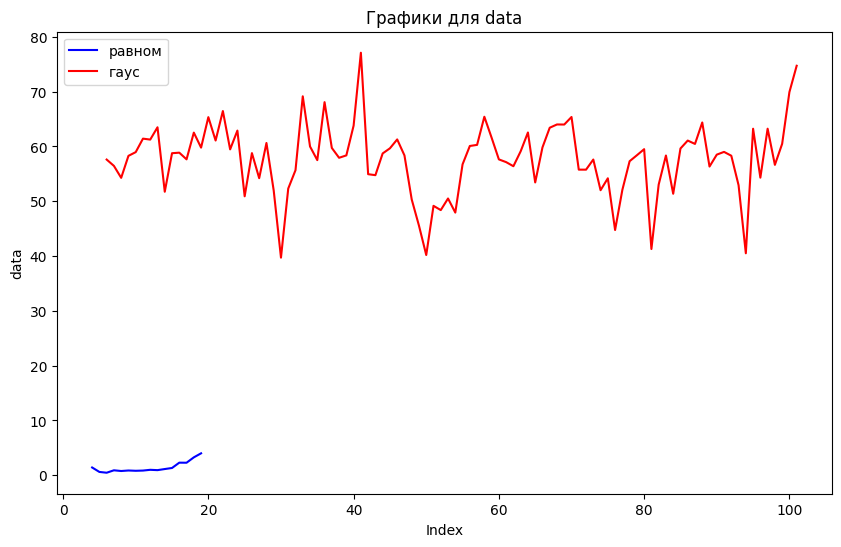

In [20]:
plot_multiple_graphs([df_ravnom_clear, df_gaus_clear], ['data', 'data'], ['равном', 'гаус'], ['blue', 'red'])

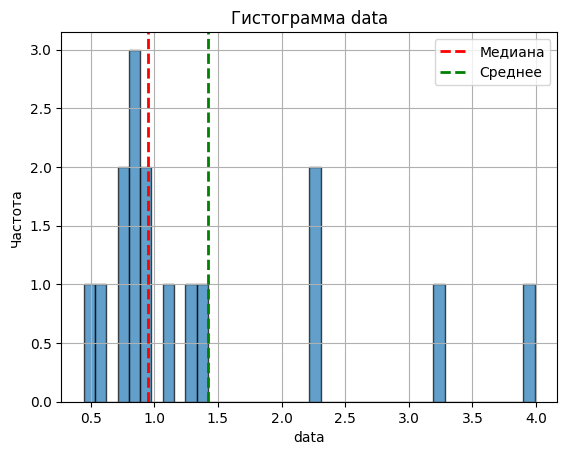

Атрибут: data
Среднее: 1.4188260971672286
Медиана: 0.9476866140054805
Мода: [1.4032074522556437, 0.5902529237166658, 0.4467154240951072, 0.8886968668567601, 0.7600949468768929, 0.8524034020597363, 0.8002344018919832, 0.8399917236752835, 0.9776456971453645, 0.9177275308655963, 1.1182471221992836, 1.3120359796106735, 2.2820652644231996, 2.2713052732518193, 3.251198850112687, 3.989394695638962]
Смещение: 1.5885617285889073



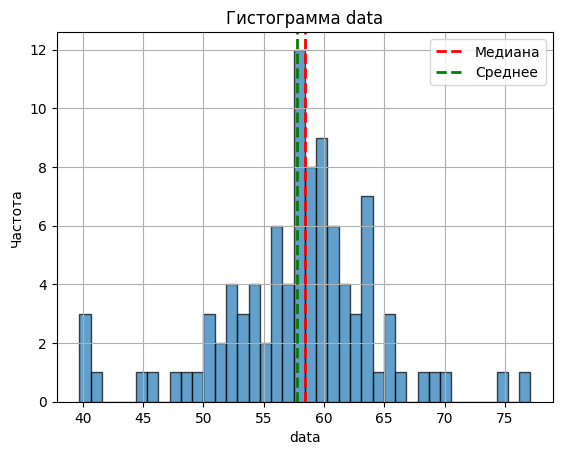

Атрибут: data
Среднее: 57.75763342097417
Медиана: 58.38814211145443
Мода: [57.61603239744605, 56.459443901356806, 44.7559702495558, 54.19495300219919, 52.020548978471815, 57.62024702282154, 55.77087581439124, 55.77638043817886, 65.38831283847162, 64.00842549067968, 64.02217496976716, 63.42478668224244, 59.82898763296644, 53.434520379397746, 62.558512047785186, 59.12458368994333, 56.399763406575644, 57.146619169388934, 57.64399827498334, 61.601991232533116, 65.43127075187319, 60.29581572214002, 60.09276060412043, 52.07884478658476, 57.314726308201735, 58.39903084371164, 59.01522813140429, 69.93341108766269, 60.48618589336717, 56.648323346050475, 63.2520601388786, 54.31180699063506, 63.243888438713405, 40.504205476481374, 52.93596917325967, 58.31317815353721, 58.51369410452454, 59.51162172795335, 56.33961095289545, 64.38465955219075, 60.468644776174706, 61.0840980987089, 59.63332818235131, 51.36842474986925, 58.35626824074126, 53.038120477260215, 41.28432859182312, 56.7384303358942, 47.9

In [21]:
plot_histogram(df_ravnom_clear, 'data', number_of_bins=40)
plot_histogram(df_gaus_clear, 'data', 40)

In [25]:
def plot_scatter_with_categories(df, x_column, y_column, title, x_label, y_label):
    categories = df[x_column].unique()
    category_mapping = {category: i for i, category in enumerate(categories)}
    numeric_x = df[x_column].map(category_mapping)

    plt.scatter(numeric_x, df[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.grid(True)
    plt.show()

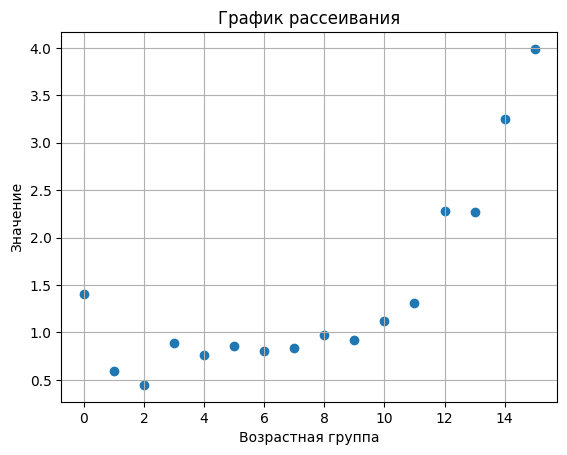

Корреляция: 0.7724374291904096


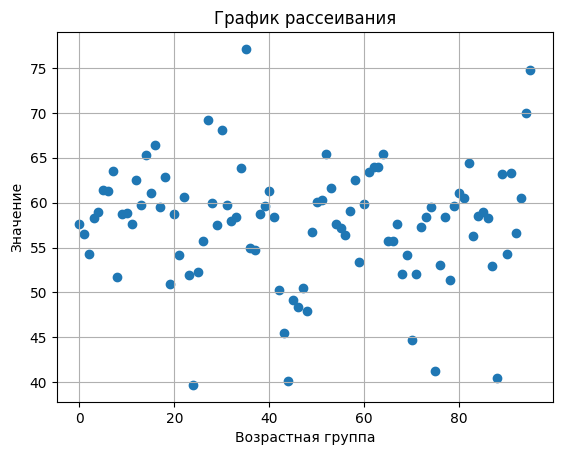

Корреляция: -0.030110106029025103


In [26]:
plot_scatter_with_categories(df_ravnom_clear, 'label', 'data', 'График рассеивания', 'Возрастная группа', 'Значение')
df_ravnom_clear['label_numeric'] = pd.factorize(df_ravnom_clear['label'])[0]
print('Корреляция:', df_ravnom_clear['label_numeric'].corr(df_ravnom_clear['data']))
plot_scatter_with_categories(df_gaus_clear, 'label', 'data', 'График рассеивания', 'Возрастная группа', 'Значение')
df_gaus_clear['label_numeric'] = pd.factorize(df_gaus_clear['label'])[0]
print('Корреляция:', df_gaus_clear['label_numeric'].corr(df_gaus_clear['data']))

Диаграмма рассеяния показывает нам возможность корреляции. Вспомним, что во втором датасете значения лейблов - это просто названия городов, регионов или областей, при это держим в голове, что первый датасет связан с возрастом, который можно считать числовым параметром. На первой диаграмме видим возможность корреляции, причём она довольна высока

In [27]:
def plot_pie_chart(df, data_column, label_column, title):
    plt.figure(figsize=(8, 8))
    plt.pie(df[data_column], labels=df[label_column], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

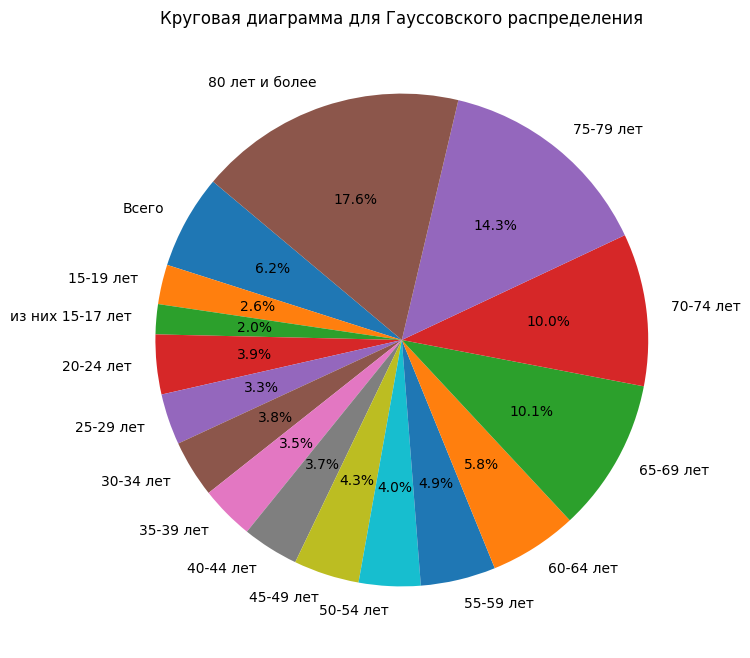

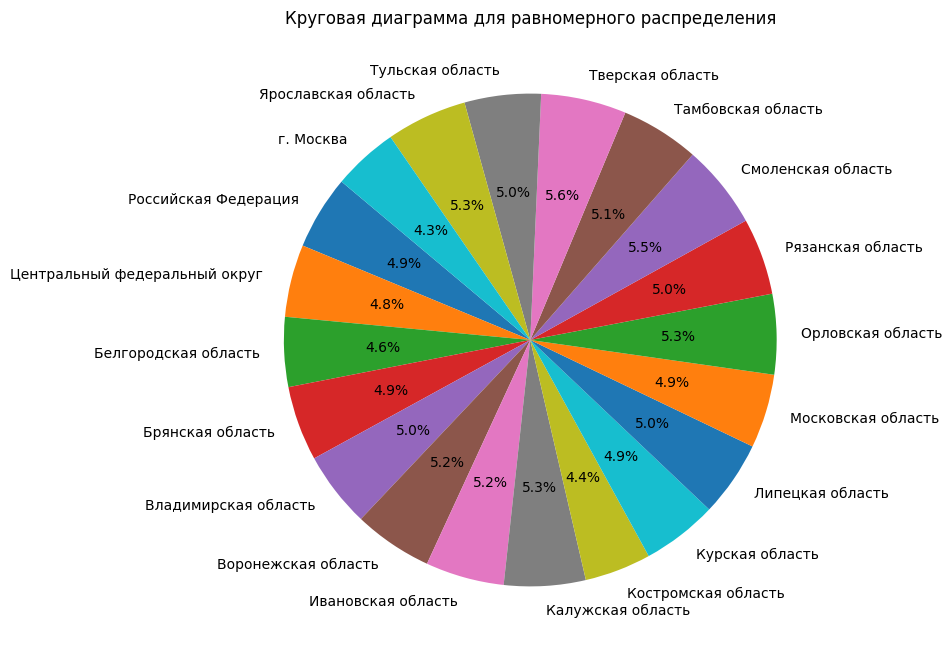

In [28]:
plot_pie_chart(df_ravnom_clear.iloc[:20], 'data', 'label', 'Круговая диаграмма для Гауссовского распределения')
plot_pie_chart(df_gaus_clear.iloc[:20], 'data', 'label', 'Круговая диаграмма для равномерного распределения')

### Часть 2

Построим диаграмму "ящик с усами" для данных, в которых вохможно есть аномалия

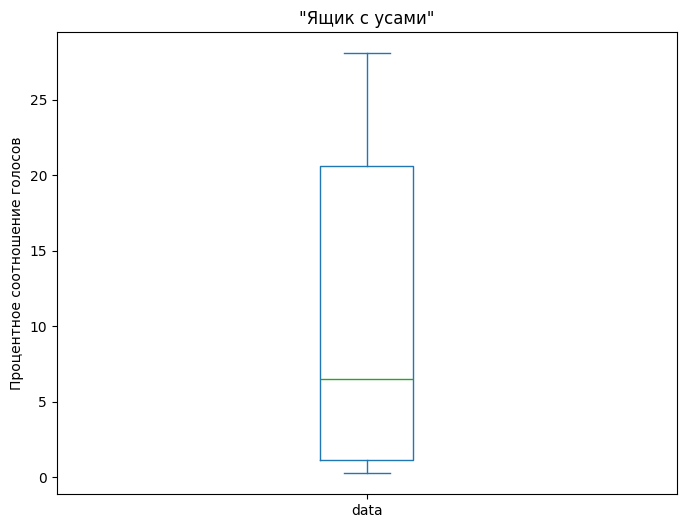

In [88]:
def plot_box(df, name):
    df[name].plot(kind='box', figsize=(8, 6))
    plt.title(f'"Ящик с усами"')
    plt.ylabel('Процентное соотношение голосов')
    plt.show()

plot_box(df_unnormal_clear, "data")

Как видно из диаграммы, медиана сильно смещена вниз, больше групп респодентов дали положительный ответ больший в процентом соотношении выше медианы, однако и больше групп дали меньший в процентом соотношении положительный ответ выше верхней квартили\
Гипотиза анамальности данных: Более возрастная группа оценивает своё здорвье всегда хуже, чем более молодая\
Используя корреляционный анализ мне кажется можно будет найти корреляции в истории болезней (человек с теми же заболеваниями выздоравливает дольше или получает осложнения), а также можно исследовать историю отношения к здоровью 

#### Выводы:
Научился использовать диаграмму "ящик с усами". Она позваоляет наглядно определять сосредотачения данных, а потому проще оценивать их